In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

DIR = "/home/julian/Documents/ndnrtc_testing/evaluation/reTrans_evaluation_results"

# read in csv file
df = pd.read_csv(DIR + '/run_overview.csv', delimiter='\t', index_col=False)

# transform columns names to lower case
df.columns = [col.lower() for col in df]

# ensuring backwards compatibility
df.rename(columns={"adaption":"init._res."}, inplace=True)

# ensuring forwards compatibility
df.rename(columns={"retr._total":"retransmissions", 
                   "al_seq.len.":"al_seq_len"}, inplace=True)

#df.head(10)

In [2]:
def addBarGroup (ax, df_f, parameter, parameter_values, parameter_lables, metric, offset, group_color):
    
    width = 1  # the width of the bars
    gap = 1 # the gap between groups of bars
    
    for i in range(len(parameter_values)):
        
        # prepare parameters
        value = parameter_values[i]
        postition = (i + offset) * width
        
        # get values
        bar = (df_f[df_f[parameter] == value].mean()[metric])
        bar_err = (df_f[df_f[parameter] == value].std()[metric])  
        
        # draw bars
        rect = ax.bar(postition, bar , width, yerr=bar_err, label=value, 
                      color=group_color, edgecolor="black", capsize=3)
        
        # add annotation
        textPos = rect[0].get_height()/2
        plt.text(postition, textPos, parameter_lables[i], color='white', 
                ha='center', va='center', size='x-large', rotation=90)


In [3]:
def drawCustomBarPlot (metric):
    
    # prepare parameters
    al_w1_fixed = 1.0
    al_w2_fixed = 1.0
    al_th1_fixed = 5
    al_th2_fixed = 15
    al_seq_len_fixed = 3
    
    # filter data according to fixed parameters
    df_f1 = df[(df.al_th1 == al_th1_fixed) 
             & (df.al_th2 == al_th2_fixed)
             & (df.al_seq_len == al_seq_len_fixed)]
    
    df_f2 = df[(df.al_w1 == al_w1_fixed) 
             & (df.al_w2 == al_w2_fixed) 
             & (df.al_seq_len == al_seq_len_fixed)]
    
    df_f3 = df[(df.al_w1 == al_w1_fixed) 
             & (df.al_w2 == al_w2_fixed) 
             & (df.al_th1 == al_th1_fixed) 
             & (df.al_th2 == al_th2_fixed)]
    
    # draw the bars
    fig, ax = plt.subplots()
    addBarGroup(ax, df_f1, "al_w1", [0.7,1.0,1.3], ['0.7 | 1.3','1.0 | 1.0','1.3 | 0.7'], metric, 0, "deepskyblue")
    addBarGroup(ax, df_f2, "al_th1", [1,2,5,10,20], ['1 | 3','2 | 6','5 | 15','10 | 30','20 | 60'], metric, 4, "royalblue")
    addBarGroup(ax, df_f3, "al_seq_len", [1,2,3,4,5], ['1','2','3','4','5'], metric, 10, "blue")
    
    # add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_title('Influence of Adaption Logic Parameters')
    ax.set_xticks([1,6,12])
    ax.set_xticklabels(('weights with\n' + 
                        'thresholds = ' + str(al_th1_fixed) + ' | ' + str(al_th2_fixed) + '\n' + 
                        'sequ. length = ' + str(al_seq_len_fixed), 
                        'thresholds with\n'
                        'weights = ' + str(al_w1_fixed) + ' | ' + str(al_w2_fixed) + '\n' +
                        'sequ. length = ' + str(al_seq_len_fixed), 
                        'sequence lengths with\n'
                        'weights = ' + str(al_w1_fixed) + ' | ' + str(al_w2_fixed) + '\n' +
                        'thresholds = ' + str(al_th1_fixed) + ' | ' + str(al_th2_fixed)))
    plt.tight_layout()
    plt.savefig(DIR + "/reTrans_parameterInfluence_" + metric + ".pdf")

In [4]:
def drawParameterInfluenceBarPlots ():
    drawCustomBarPlot("psnr")
    drawCustomBarPlot("ssim")
    drawCustomBarPlot("vmaf")

    metric = "frames_missing"
    drawCustomBarPlot(metric)
    plt.ylabel("missing frames")
    plt.savefig(DIR + "/reTrans_parameterInfluence_" + metric + ".pdf")

    drawCustomBarPlot("retransmissions")

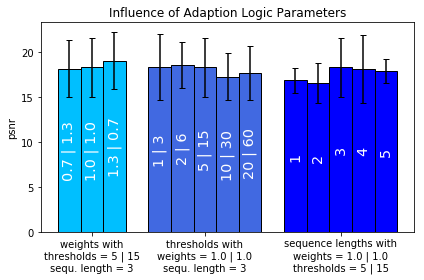

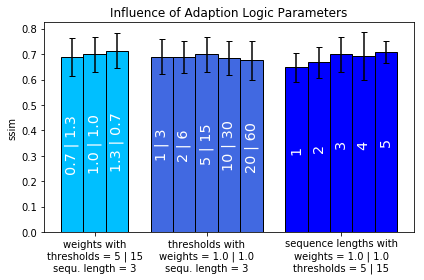

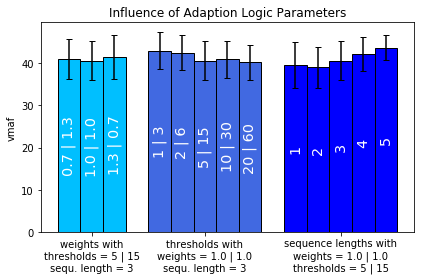

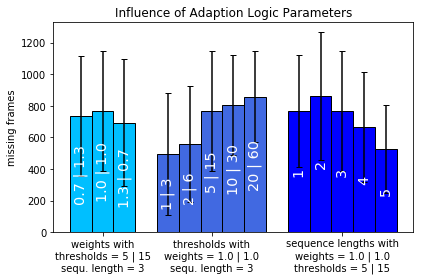

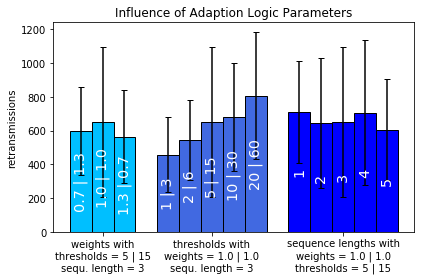

In [5]:
drawParameterInfluenceBarPlots()